<a href="https://colab.research.google.com/github/allen-ajith/Animals-10-Classification-using-Transfer-Learning-/blob/main/Transfer_Learning_Animal_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Leveraging Transfer Learning for classifying Animal images

Model used: [EfficientNet_b0](https://pytorch.org/vision/stable/models/efficientnet.html)

Dataset used: [Animals-10 Dataset](https://www.kaggle.com/datasets/alessiocorrado99/animals10)

(26K Images, 10 Classes)


##Get the Animals-10 Dataset
1. Download the dataset
2.Translate class names from Italian to English
3. Create Train/Test split

In [15]:
import torch
import torchvision

import matplotlib.pyplot as plt

print(f" PyTorch version: {torch.__version__}")
print(f"Torchvison version: {torchvision.__version__}")

import torchvision.datasets as datasets
import torchvision.transforms as transforms

device = "cuda" if torch.cuda.is_available() else "cpu"


 PyTorch version: 2.3.0+cu121
Torchvison version: 0.18.0+cu121


In [16]:
!pip install opendatasets

In [17]:
import opendatasets as od

od.download("https://www.kaggle.com/datasets/alessiocorrado99/animals10")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: allengeorgeajith
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/alessiocorrado99/animals10


100%|██████████| 586M/586M [00:27<00:00, 22.2MB/s]


In [18]:
import pathlib
from pathlib import Path
import os

data_path = Path("animals10/")
image_path = data_path / "raw-img"

if image_path.is_dir():
  print(f"{image_path} directory exists.")
else:
  print(f"Did not find {image_path} directory, Try downloading again!")


for dirpath, dirnames, filenames in os.walk(image_path):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


animals10/raw-img directory exists.
There are 10 directories and 0 images in 'animals10/raw-img'.
There are 0 directories and 2112 images in 'animals10/raw-img/farfalla'.
There are 0 directories and 4821 images in 'animals10/raw-img/ragno'.
There are 0 directories and 1862 images in 'animals10/raw-img/scoiattolo'.
There are 0 directories and 1820 images in 'animals10/raw-img/pecora'.
There are 0 directories and 4863 images in 'animals10/raw-img/cane'.
There are 0 directories and 2623 images in 'animals10/raw-img/cavallo'.
There are 0 directories and 1446 images in 'animals10/raw-img/elefante'.
There are 0 directories and 3098 images in 'animals10/raw-img/gallina'.
There are 0 directories and 1866 images in 'animals10/raw-img/mucca'.
There are 0 directories and 1668 images in 'animals10/raw-img/gatto'.


###Translate class names from Italian to English

In [19]:
translate_it_eng = {"cane": "dog", "cavallo": "horse", "elefante": "elephant", "farfalla": "butterfly", "gallina": "chicken", "gatto": "cat", "mucca": "cow", "pecora": "sheep", "scoiattolo": "squirrel", "ragno": "spider"}
len(translate_it_eng)


10

In [20]:
for dirpath, dirnames, filenames in os.walk(image_path):
  it_label  = os.path.basename(dirpath)
  if it_label in translate_it_eng:
    eng_label = translate_it_eng[it_label]
    os.rename(image_path/ it_label, image_path/ eng_label)




In [21]:
for dirpath, dirnames, filenames in os.walk(image_path):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 10 directories and 0 images in 'animals10/raw-img'.
There are 0 directories and 2623 images in 'animals10/raw-img/horse'.
There are 0 directories and 1668 images in 'animals10/raw-img/cat'.
There are 0 directories and 4863 images in 'animals10/raw-img/dog'.
There are 0 directories and 1862 images in 'animals10/raw-img/squirrel'.
There are 0 directories and 1866 images in 'animals10/raw-img/cow'.
There are 0 directories and 1446 images in 'animals10/raw-img/elephant'.
There are 0 directories and 1820 images in 'animals10/raw-img/sheep'.
There are 0 directories and 4821 images in 'animals10/raw-img/spider'.
There are 0 directories and 2112 images in 'animals10/raw-img/butterfly'.
There are 0 directories and 3098 images in 'animals10/raw-img/chicken'.


There are too many images (will increase train time). Let's delete some images randomly.

In [22]:
import random
random.seed(42)
delete_percentage = 0.8
for dirpath, dirnames, filenames in os.walk(image_path):
  files = os.listdir(dirpath)
  images = [f for f in files if f.lower().endswith(('png', 'jpg', 'jpeg', 'gif', 'bmp'))]
  if images:
    num_to_delete = int(len(images) * delete_percentage)
    images_to_delete = random.sample(images, num_to_delete)

    for image in images_to_delete:
        os.remove(os.path.join(dirpath, image))
    print(f'Deleted {num_to_delete} images randomly from {dirpath}')


Deleted 2098 images randomly from animals10/raw-img/horse
Deleted 1334 images randomly from animals10/raw-img/cat
Deleted 3890 images randomly from animals10/raw-img/dog
Deleted 1489 images randomly from animals10/raw-img/squirrel
Deleted 1492 images randomly from animals10/raw-img/cow
Deleted 1156 images randomly from animals10/raw-img/elephant
Deleted 1456 images randomly from animals10/raw-img/sheep
Deleted 3856 images randomly from animals10/raw-img/spider
Deleted 1689 images randomly from animals10/raw-img/butterfly
Deleted 2478 images randomly from animals10/raw-img/chicken


In [23]:
for dirpath, dirnames, filenames in os.walk(image_path):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 10 directories and 0 images in 'animals10/raw-img'.
There are 0 directories and 525 images in 'animals10/raw-img/horse'.
There are 0 directories and 334 images in 'animals10/raw-img/cat'.
There are 0 directories and 973 images in 'animals10/raw-img/dog'.
There are 0 directories and 373 images in 'animals10/raw-img/squirrel'.
There are 0 directories and 374 images in 'animals10/raw-img/cow'.
There are 0 directories and 290 images in 'animals10/raw-img/elephant'.
There are 0 directories and 364 images in 'animals10/raw-img/sheep'.
There are 0 directories and 965 images in 'animals10/raw-img/spider'.
There are 0 directories and 423 images in 'animals10/raw-img/butterfly'.
There are 0 directories and 620 images in 'animals10/raw-img/chicken'.


###Create Train / Test split

Use [split-folders](https://pypi.org/project/split-folders/
)

`85% Train`
`15% Test`

In [24]:
!pip install split-folders

In [25]:
import splitfolders

splitfolders.ratio(image_path, output="animals_formatted",
    seed=42, ratio=(.85, .15), group_prefix=None, move=False)

Copying files: 5241 files [00:02, 2376.33 files/s]


In [26]:
if os.path.isdir("animals_formatted/val") :
  os.rename(Path("animals_formatted")/"val",Path("animals_formatted")/"test")

In [27]:
train_dir = Path("animals_formatted/train")

test_dir = Path("animals_formatted/test")

##Creating Datasets

We must ensure that the custom data going into the model is of the same format as the data it was initally trained on.

In [28]:
weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT # .DEFAULT = best available weights from pretraining on ImageNet
weights

EfficientNet_B0_Weights.IMAGENET1K_V1

In [29]:
transform = weights.transforms()

transform

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BICUBIC
)

In [30]:
from torchvision.datasets import ImageFolder

train_data = ImageFolder(root = train_dir,
                         transform = transform,
                         target_transform = None
                         )

test_data = ImageFolder(root = test_dir,
                         transform = transform,
                         target_transform = None
                         )



##Batchify into DataLoader iterables

In [31]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()
train_dataloader = DataLoader(dataset=train_data,
                              batch_size = BATCH_SIZE,
                              shuffle=True,
                              num_workers=NUM_WORKERS
                              )

test_dataloader = DataLoader(dataset=test_data,
                             batch_size = BATCH_SIZE,
                             shuffle=False,
                             num_workers=NUM_WORKERS
                             )


##Set up pretrained EfficientNet_b0 model from torchhvision.models

In [32]:
model_0 = torchvision.models.efficientnet_b0(weights=weights).to(device)

Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 128MB/s]


In [33]:
class_names = train_data.classes
class_to_idx = train_data.class_to_idx
class_to_idx

{'butterfly': 0,
 'cat': 1,
 'chicken': 2,
 'cow': 3,
 'dog': 4,
 'elephant': 5,
 'horse': 6,
 'sheep': 7,
 'spider': 8,
 'squirrel': 9}

In [34]:
!pip install torchinfo

In [35]:
from torchinfo import summary
model_stats = summary(model=model_0,
        input_size=(32, 3, 224, 224),
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
        )

model_stats

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [32, 3, 224, 224]    [32, 1000]           --                   True
├─Sequential (features)                                      [32, 3, 224, 224]    [32, 1280, 7, 7]     --                   True
│    └─Conv2dNormActivation (0)                              [32, 3, 224, 224]    [32, 32, 112, 112]   --                   True
│    │    └─Conv2d (0)                                       [32, 3, 224, 224]    [32, 32, 112, 112]   864                  True
│    │    └─BatchNorm2d (1)                                  [32, 32, 112, 112]   [32, 32, 112, 112]   64                   True
│    │    └─SiLU (2)                                         [32, 32, 112, 112]   [32, 32, 112, 112]   --                   --
│    └─Sequential (1)                                        [32, 32, 112, 112]   [32, 16, 112

Let's freeze the base layers (features section) and change the output (classifier) layer to suit out task.

In [36]:
for param in model_0.features.parameters():
    param.requires_grad = False

In [37]:
model_stats_frozen = summary(model=model_0,
        input_size=(32, 3, 224, 224),
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
        )

model_stats_frozen

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [32, 3, 224, 224]    [32, 1000]           --                   Partial
├─Sequential (features)                                      [32, 3, 224, 224]    [32, 1280, 7, 7]     --                   False
│    └─Conv2dNormActivation (0)                              [32, 3, 224, 224]    [32, 32, 112, 112]   --                   False
│    │    └─Conv2d (0)                                       [32, 3, 224, 224]    [32, 32, 112, 112]   (864)                False
│    │    └─BatchNorm2d (1)                                  [32, 32, 112, 112]   [32, 32, 112, 112]   (64)                 False
│    │    └─SiLU (2)                                         [32, 32, 112, 112]   [32, 32, 112, 112]   --                   --
│    └─Sequential (1)                                        [32, 32, 112, 112]   [32, 

In [38]:
# Set the manual seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Get the length of class_names (one output unit for each class)
output_shape = len(class_names)

# Recreate the classifier layer in the model and seed it to the target device
model_0.classifier = torch.nn.Sequential(
    torch.nn.Dropout(p=0.2, inplace=True),
    torch.nn.Linear(in_features=1280,
                    out_features=output_shape, # same number of output units as our number of classes
                    bias=True)).to(device)

In [39]:
model_stats_frozen = summary(model=model_0,
        input_size=(32, 3, 224, 224),
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
        )

model_stats_frozen


Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [32, 3, 224, 224]    [32, 10]             --                   Partial
├─Sequential (features)                                      [32, 3, 224, 224]    [32, 1280, 7, 7]     --                   False
│    └─Conv2dNormActivation (0)                              [32, 3, 224, 224]    [32, 32, 112, 112]   --                   False
│    │    └─Conv2d (0)                                       [32, 3, 224, 224]    [32, 32, 112, 112]   (864)                False
│    │    └─BatchNorm2d (1)                                  [32, 32, 112, 112]   [32, 32, 112, 112]   (64)                 False
│    │    └─SiLU (2)                                         [32, 32, 112, 112]   [32, 32, 112, 112]   --                   --
│    └─Sequential (1)                                        [32, 32, 112, 112]   [32, 

Model is now set up for 10 classes

##Set up Loss function, Optimizer, Train step function and Test step function

In [40]:
from torch import nn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model_0.parameters(),
                             lr = 0.001)

In [41]:
def train_step(model:nn.Module,
               dataloader:torch.utils.data.DataLoader,
               loss_fn: torch.nn,
               optimizer: torch.optim.Optimizer,
               device = device
               ):

  """Takes model, dataloader, loss function, optimizer, device as arguments and steps over all the batches in dataloader a single time while training the model.

  Returns train loss and accuracy.

  """

  model.train()
  train_loss, train_acc = 0, 0

  for batch, (X,y) in enumerate(dataloader):
    X, y = X.to(device), y.to(device)

    y_logits = model(X)

    loss = loss_fn(y_logits, y)
    train_loss+=loss

    acc=(y_logits.argmax(dim=1)==y).sum().item()/len(y)
    train_acc += acc

    optimizer.zero_grad()
    loss.backward()

    optimizer.step()

  train_loss /= len(dataloader)
  train_acc /= len(dataloader)

  print(f"Train Loss:{train_loss: .4f}, Train Accuracy:{train_acc: .3f}")

  return train_loss, train_acc


In [42]:
def test_step(model: nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: nn.Module,
              device = device):


  """Takes model, dataloader, loss function, device as arguments and steps over all the batches in dataloader a single time to evaluate the model.

  Returns test loss and accuracy.

  """


  test_loss, test_acc = 0, 0

  model.eval()

  with torch.inference_mode():
    for X, y in iter(dataloader):
      X, y = X.to(device), y.to(device)

      y_logits = model(X)

      loss = loss_fn(y_logits, y)
      test_loss = test_loss + loss

      acc = (y_logits.argmax(dim=1)==y).sum().item()/len(y)
      test_acc = test_acc + acc

  test_loss= test_loss / len(dataloader)
  test_acc= test_acc / len(dataloader)

  print(f"Test Loss:{test_loss: .4f}, Test Accuracy:{test_acc: .3f}\n\n")

  return test_loss, test_acc





##Train the model

In [43]:
model_results = {} #Initialized to store model results in test_loop()

In [44]:
def test_loop(model: nn.Module,
              train_dataloader: torch.utils.data.DataLoader,
              test_dataloader: torch.utils.data.DataLoader,
              loss_fn: nn.Module,
              optimizer: torch.optim.Optimizer,
              epochs: int,
              device = device):

  from tqdm.auto import tqdm
  from timeit import default_timer as timer

  results = {"train_loss": [],
      "train_acc": [],
      "test_loss": [],
      "test_acc": [],
      "total_time": []}


  start_time = timer()

  for epoch in tqdm(range(epochs)):

    print(f"Epoch {epoch+1}")
    train_loss, train_acc = train_step(model, train_dataloader, loss_fn, optimizer, device)

    test_loss, test_acc = test_step(model, test_dataloader, loss_fn, device)


    results["train_loss"].append(train_loss.item())
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss.item())
    results["test_acc"].append(test_acc)

  end_time = timer()

  results["total_time"].append(end_time - start_time)

  model_type = model.__class__.__name__

  model_results[model_type] = results



In [45]:
test_loop(model_0, train_dataloader, test_dataloader, loss_fn, optimizer, 8, device)

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1
Train Loss: 0.8729, Train Accuracy: 0.813
Test Loss: 0.4802, Test Accuracy: 0.906


Epoch 2
Train Loss: 0.3579, Train Accuracy: 0.917
Test Loss: 0.3481, Test Accuracy: 0.912


Epoch 3
Train Loss: 0.2832, Train Accuracy: 0.927
Test Loss: 0.3019, Test Accuracy: 0.921


Epoch 4
Train Loss: 0.2536, Train Accuracy: 0.930
Test Loss: 0.2711, Test Accuracy: 0.926


Epoch 5
Train Loss: 0.2310, Train Accuracy: 0.937
Test Loss: 0.2646, Test Accuracy: 0.927


Epoch 6
Train Loss: 0.2075, Train Accuracy: 0.939
Test Loss: 0.2494, Test Accuracy: 0.930


Epoch 7
Train Loss: 0.1958, Train Accuracy: 0.943
Test Loss: 0.2400, Test Accuracy: 0.926


Epoch 8
Train Loss: 0.1765, Train Accuracy: 0.949
Test Loss: 0.2508, Test Accuracy: 0.932




In [46]:
model_results

{'EfficientNet': {'train_loss': [0.8729007244110107,
   0.3579343557357788,
   0.2831770181655884,
   0.253629207611084,
   0.23100490868091583,
   0.2075086385011673,
   0.19578024744987488,
   0.17646880447864532],
  'train_acc': [0.8130208333333334,
   0.9174107142857143,
   0.926860119047619,
   0.9295386904761904,
   0.9371279761904762,
   0.9391369047619047,
   0.9427083333333333,
   0.9486607142857143],
  'test_loss': [0.48023831844329834,
   0.34810951352119446,
   0.3018905818462372,
   0.2711128890514374,
   0.26462772488594055,
   0.2494032233953476,
   0.24002331495285034,
   0.2508138418197632],
  'test_acc': [0.90625,
   0.9125,
   0.92125,
   0.92625,
   0.9275,
   0.93,
   0.92625,
   0.9325],
  'total_time': [233.34909397]}}

##Plot Loss curves

In [47]:
def plot_loss_curves(results):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """


    loss = results['train_loss']
    test_loss = results['test_loss']


    accuracy = results['train_acc']
    test_accuracy = results['test_acc']


    epochs = range(len(results['train_loss']))


    plt.figure(figsize=(12, 5))


    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()


    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

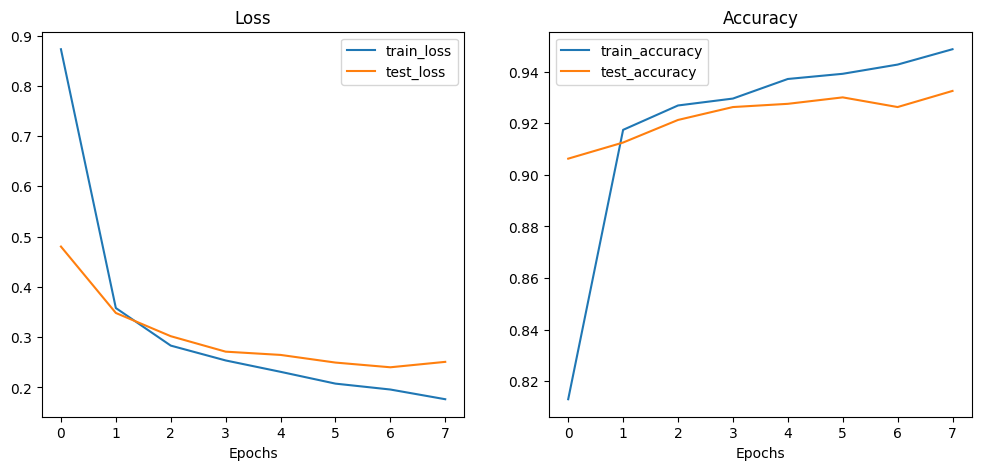

In [48]:
plot_loss_curves(model_results['EfficientNet'])

Looks like there is a bit of overfitting. Let's try solving that with Data Augmentation.

##Data Augmentation to reduce overfitting

In [55]:
transform_augment = transforms.Compose([transforms.TrivialAugmentWide(num_magnitude_bins=31),
                                        transform])

transform_augment

Compose(
    TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
    ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BICUBIC
)
)

In [57]:
from torchvision.datasets import ImageFolder

train_data = ImageFolder(root = train_dir,
                         transform = transform_augment,
                         target_transform = None
                         )

test_data = ImageFolder(root = test_dir,
                         transform = transform_augment,
                         target_transform = None
                         )

from torch.utils.data import DataLoader

BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()
train_dataloader = DataLoader(dataset=train_data,
                              batch_size = BATCH_SIZE,
                              shuffle=True,
                              num_workers=NUM_WORKERS
                              )

test_dataloader = DataLoader(dataset=test_data,
                             batch_size = BATCH_SIZE,
                             shuffle=False,
                             num_workers=NUM_WORKERS
                             )

In [58]:
model_0 = torchvision.models.efficientnet_b0(weights=weights).to(device)

for param in model_0.features.parameters():
    param.requires_grad = False


torch.manual_seed(42)
torch.cuda.manual_seed(42)

output_shape = len(class_names)


model_0.classifier = torch.nn.Sequential(
    torch.nn.Dropout(p=0.2, inplace=True),
    torch.nn.Linear(in_features=1280,
                    out_features=output_shape,
                    bias=True)).to(device)

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1
Train Loss: 0.9872, Train Accuracy: 0.774
Test Loss: 0.5620, Test Accuracy: 0.875


Epoch 2
Train Loss: 0.4934, Train Accuracy: 0.869
Test Loss: 0.4545, Test Accuracy: 0.881


Epoch 3
Train Loss: 0.4142, Train Accuracy: 0.881
Test Loss: 0.3742, Test Accuracy: 0.887


Epoch 4
Train Loss: 0.3714, Train Accuracy: 0.889
Test Loss: 0.3744, Test Accuracy: 0.893


Epoch 5
Train Loss: 0.3537, Train Accuracy: 0.893
Test Loss: 0.3422, Test Accuracy: 0.903


Epoch 6
Train Loss: 0.3388, Train Accuracy: 0.894
Test Loss: 0.3484, Test Accuracy: 0.901


Epoch 7
Train Loss: 0.3243, Train Accuracy: 0.899
Test Loss: 0.3434, Test Accuracy: 0.901


Epoch 8
Train Loss: 0.3176, Train Accuracy: 0.897
Test Loss: 0.3046, Test Accuracy: 0.902




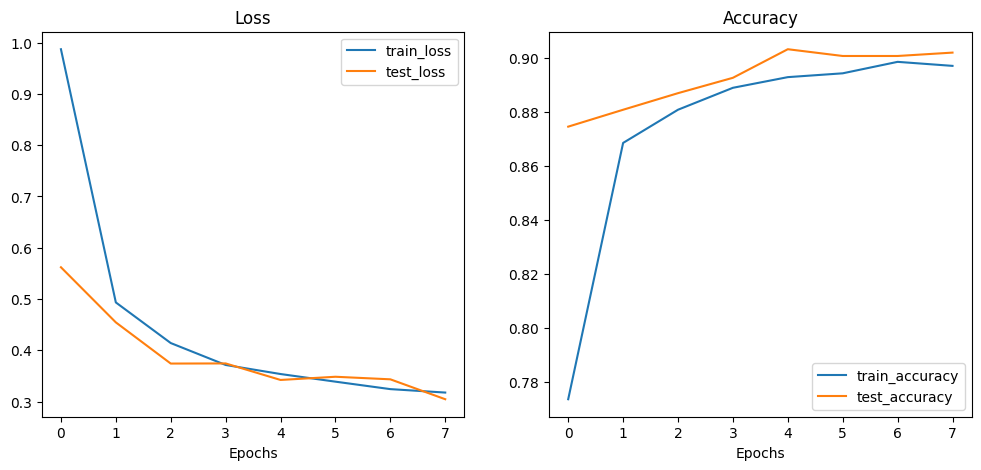

In [60]:
from torch import nn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model_0.parameters(),
                             lr = 0.001)

test_loop(model_0, train_dataloader, test_dataloader, loss_fn, optimizer, 8, device)
plot_loss_curves(model_results['EfficientNet'])



## Evaluate with Custom Images

In [61]:
transform

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BICUBIC
)

In [65]:
from PIL import Image
image = Image.open('custom-images/kot.jpg')
sample_img = transform(image).to(device).unsqueeze(dim=0)
y_sample_pred = model_0(sample_img).argmax(dim=1)
y_sample_pred_class = class_names[y_sample_pred]
y_sample_pred_class

'squirrel'

In [63]:
from PIL import Image
image = Image.open('custom-images/chihauaua.jpg')
sample_img = transform(image).to(device).unsqueeze(dim=0)

y_sample_pred = model_0(sample_img).argmax(dim=1)
y_sample_pred_class = class_names[y_sample_pred]
y_sample_pred_class

'dog'